# Week 2: KNN Practice Questions

**Course:** COMP SCI 465 — Machine Learning (Spring 2026)  
**Topic:** K-Nearest Neighbors (Classification & Regression)



---

## Q1 — KNN for Regression

> A real estate company uses KNN to predict the **exact selling price** of a house based on nearby houses. What type of problem is this?

**Answer:** **Regression** — The target variable (selling price) is a continuous value, so predicting it is a regression task.

---

## Q2 — KNN for Classification

> A hospital uses KNN to predict whether a patient **has diabetes or not**. This is an example of:

**Answer:** **Classification** — The output is one of two discrete categories (diabetes / no diabetes).

---

## Q3 — Majority Voting in KNN Classification

> A KNN classifier uses **K = 5**. Among the nearest neighbors, **3 belong to Class A** and **2 belong to Class B**. What is the predicted class?

**Answer:** **Class A** — KNN classification uses majority voting; the class with the most neighbors wins (3 > 2).

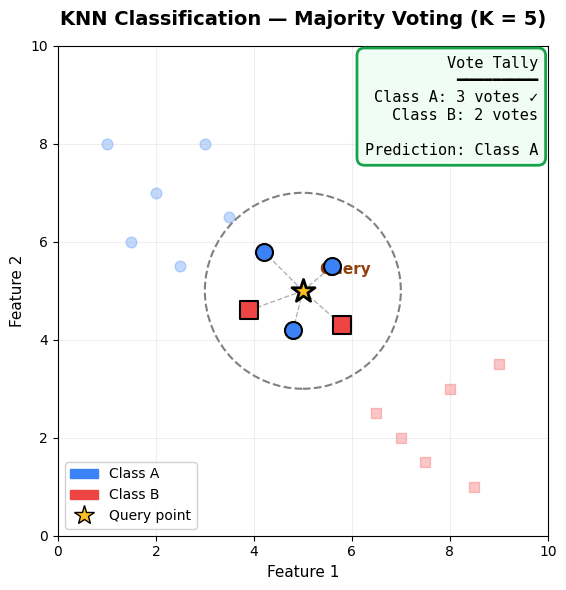

In [1]:
## Graph — KNN Classification: Majority Voting (K = 5)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

fig, ax = plt.subplots(figsize=(7, 6))

# Query point
query = np.array([5.0, 5.0])

# Neighbors: 3 Class A, 2 Class B
np.random.seed(42)
neighbors_a = np.array([[4.2, 5.8], [5.6, 5.5], [4.8, 4.2]])
neighbors_b = np.array([[5.8, 4.3], [3.9, 4.6]])

# Background scatter (extra training points)
bg_a = np.array([[2, 7], [3, 8], [1.5, 6], [3.5, 6.5], [2.5, 5.5], [1, 8]])
bg_b = np.array([[7, 2], [8, 3], [7.5, 1.5], [6.5, 2.5], [8.5, 1], [9, 3.5]])

ax.scatter(bg_a[:, 0], bg_a[:, 1], c='#3b82f6', s=60, alpha=0.3, marker='o')
ax.scatter(bg_b[:, 0], bg_b[:, 1], c='#ef4444', s=60, alpha=0.3, marker='s')

# Draw circle around query
circle = plt.Circle(query, 2.0, fill=False, linestyle='--', color='gray', linewidth=1.5, label='K=5 neighborhood')
ax.add_patch(circle)

# Plot neighbors
ax.scatter(neighbors_a[:, 0], neighbors_a[:, 1], c='#3b82f6', s=150, marker='o', edgecolors='black', linewidths=1.5, zorder=5)
ax.scatter(neighbors_b[:, 0], neighbors_b[:, 1], c='#ef4444', s=150, marker='s', edgecolors='black', linewidths=1.5, zorder=5)

# Draw lines from query to each neighbor
for pt in np.vstack([neighbors_a, neighbors_b]):
    ax.plot([query[0], pt[0]], [query[1], pt[1]], 'k--', alpha=0.3, linewidth=1)

# Query point
ax.scatter(*query, c='#fbbf24', s=300, marker='*', edgecolors='black', linewidths=2, zorder=10, label='Query point')

# Annotations
ax.annotate('Query', query, textcoords="offset points", xytext=(12, 12),
            fontsize=11, fontweight='bold', color='#92400e')

# Vote tally box
props = dict(boxstyle='round,pad=0.5', facecolor='#f0fdf4', edgecolor='#16a34a', linewidth=2)
ax.text(0.98, 0.98, 'Vote Tally\n━━━━━━━━━\nClass A: 3 votes ✓\nClass B: 2 votes\n\nPrediction: Class A',
        transform=ax.transAxes, fontsize=11, verticalalignment='top', horizontalalignment='right',
        bbox=props, fontfamily='monospace')

# Legend
patch_a = mpatches.Patch(color='#3b82f6', label='Class A')
patch_b = mpatches.Patch(color='#ef4444', label='Class B')
ax.legend(handles=[patch_a, patch_b, 
                   plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='#fbbf24',
                              markersize=15, markeredgecolor='black', label='Query point')],
          loc='lower left', fontsize=10, framealpha=0.9)

ax.set_title('KNN Classification — Majority Voting (K = 5)', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Feature 1', fontsize=11)
ax.set_ylabel('Feature 2', fontsize=11)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

---

## Q4 — KNN Regression: Averaging Neighbors

> A KNN regression model uses **K = 4** and the nearest neighbor values are: **10, 12, 14, 16**. What is the predicted value?

**Answer:** **13** — KNN regression averages the target values of the K nearest neighbors:  
$$\hat{y} = \frac{10 + 12 + 14 + 16}{4} = \frac{52}{4} = 13$$

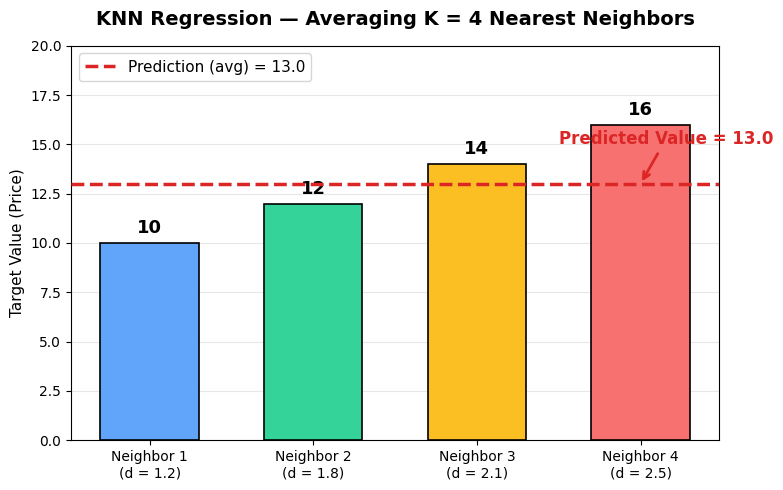

In [2]:
## Graph — KNN Regression: Averaging K = 4 Neighbors

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))

# Neighbor values
neighbors = [10, 12, 14, 16]
labels = ['Neighbor 1\n(d = 1.2)', 'Neighbor 2\n(d = 1.8)', 'Neighbor 3\n(d = 2.1)', 'Neighbor 4\n(d = 2.5)']
colors = ['#60a5fa', '#34d399', '#fbbf24', '#f87171']

bars = ax.bar(labels, neighbors, color=colors, edgecolor='black', linewidth=1.2, width=0.6, zorder=3)

# Add value labels on bars
for bar, val in zip(bars, neighbors):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
            f'{val}', ha='center', va='bottom', fontsize=13, fontweight='bold')

# Average line
avg = np.mean(neighbors)
ax.axhline(y=avg, color='#dc2626', linewidth=2.5, linestyle='--', zorder=4, label=f'Prediction (avg) = {avg}')

# Annotation for the average
ax.annotate(f'Predicted Value = {avg}', xy=(3, avg), xytext=(2.5, avg + 2),
            fontsize=12, fontweight='bold', color='#dc2626',
            arrowprops=dict(arrowstyle='->', color='#dc2626', lw=2))

ax.set_title('KNN Regression — Averaging K = 4 Nearest Neighbors', fontsize=14, fontweight='bold', pad=15)
ax.set_ylabel('Target Value (Price)', fontsize=11)
ax.set_ylim(0, 20)
ax.legend(fontsize=11, loc='upper left')
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

---

## Q5 — Distance-Weighted KNN

> A KNN model gives **equal importance to far and near neighbors**, reducing accuracy. Which improvement should be applied?

**Answer:** **Distance-weighted KNN** — Instead of treating all K neighbors equally, weight each neighbor's vote by the **inverse of its distance** to the query point. Closer neighbors get more influence.

$$w_i = \frac{1}{d(x_q,\, x_i)}$$

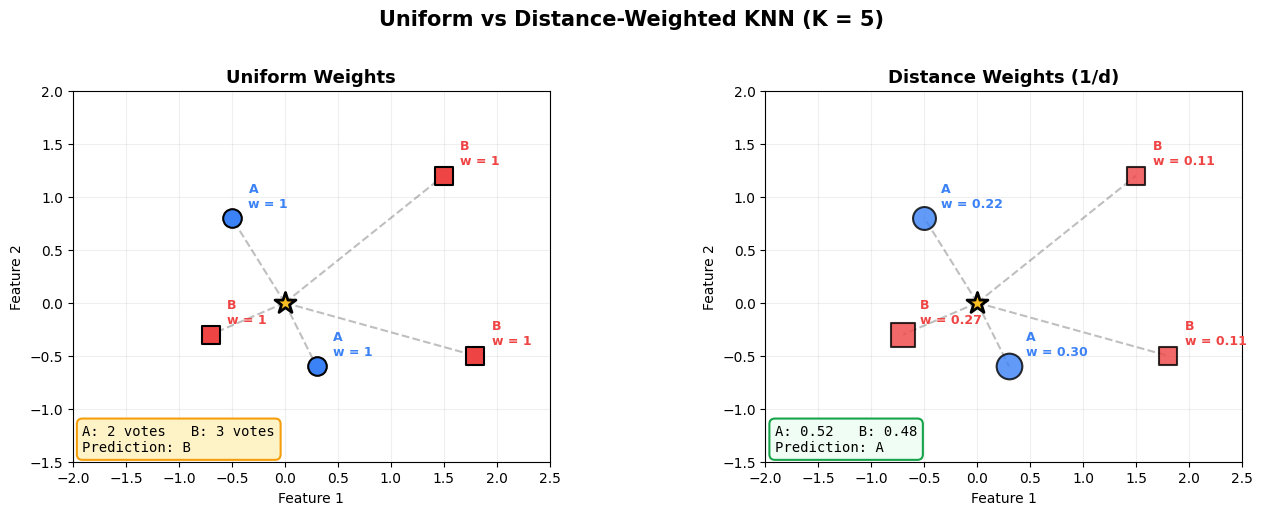

In [3]:
## Graph — Uniform vs Distance-Weighted KNN

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ─── Shared data ───
query = np.array([0, 0])
neighbors = np.array([[-0.5, 0.8], [0.3, -0.6], [-0.7, -0.3], [1.5, 1.2], [1.8, -0.5]])
classes = ['A', 'A', 'B', 'B', 'B']
class_colors = {'A': '#3b82f6', 'B': '#ef4444'}
distances = np.sqrt(np.sum((neighbors - query)**2, axis=1))

# ─── Panel 1: Uniform Weights ───
ax = axes[0]
for i, (pt, cls) in enumerate(zip(neighbors, classes)):
    ax.scatter(*pt, c=class_colors[cls], s=180, edgecolors='black', linewidths=1.5, zorder=5,
               marker='o' if cls == 'A' else 's')
    ax.annotate(f'{cls}\nw = 1', pt, textcoords="offset points", xytext=(12, 8),
                fontsize=9, fontweight='bold', color=class_colors[cls])
    ax.plot([0, pt[0]], [0, pt[1]], 'k--', alpha=0.25)

ax.scatter(*query, c='#fbbf24', s=250, marker='*', edgecolors='black', linewidths=2, zorder=10)
ax.set_title('Uniform Weights', fontsize=13, fontweight='bold')
props = dict(boxstyle='round,pad=0.4', facecolor='#fef3c7', edgecolor='#f59e0b', linewidth=1.5)
ax.text(0.02, 0.02, 'A: 2 votes   B: 3 votes\nPrediction: B', transform=ax.transAxes,
        fontsize=10, va='bottom', bbox=props, fontfamily='monospace')
ax.set_xlim(-2, 2.5)
ax.set_ylim(-1.5, 2)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid(True, alpha=0.2)
ax.set_aspect('equal')

# ─── Panel 2: Distance Weights ───
ax = axes[1]
weights = 1.0 / distances
norm_weights = weights / weights.sum()

for i, (pt, cls) in enumerate(zip(neighbors, classes)):
    size = 100 + norm_weights[i] * 800
    ax.scatter(*pt, c=class_colors[cls], s=size, edgecolors='black', linewidths=1.5, zorder=5,
               marker='o' if cls == 'A' else 's', alpha=0.8)
    ax.annotate(f'{cls}\nw = {norm_weights[i]:.2f}', pt, textcoords="offset points", xytext=(12, 8),
                fontsize=9, fontweight='bold', color=class_colors[cls])
    ax.plot([0, pt[0]], [0, pt[1]], 'k--', alpha=0.25)

ax.scatter(*query, c='#fbbf24', s=250, marker='*', edgecolors='black', linewidths=2, zorder=10)
ax.set_title('Distance Weights (1/d)', fontsize=13, fontweight='bold')

w_a = sum(norm_weights[i] for i, c in enumerate(classes) if c == 'A')
w_b = sum(norm_weights[i] for i, c in enumerate(classes) if c == 'B')
winner = 'A' if w_a > w_b else 'B'
props2 = dict(boxstyle='round,pad=0.4', facecolor='#f0fdf4', edgecolor='#16a34a', linewidth=1.5)
ax.text(0.02, 0.02, f'A: {w_a:.2f}   B: {w_b:.2f}\nPrediction: {winner}',
        transform=ax.transAxes, fontsize=10, va='bottom', bbox=props2, fontfamily='monospace')
ax.set_xlim(-2, 2.5)
ax.set_ylim(-1.5, 2)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.grid(True, alpha=0.2)
ax.set_aspect('equal')

fig.suptitle('Uniform vs Distance-Weighted KNN (K = 5)', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---

## Q6 — Why KNN Is Slow on Large Datasets

> A KNN model becomes **very slow** when predicting on a large dataset. Why?

**Answer:** KNN requires computing the **distance between the query point and every single training point** at prediction time. There is no pre-built model — it is a **lazy learner**. As the dataset grows, prediction cost grows linearly (or worse).

| Phase | Lazy Learner (KNN) | Eager Learner (e.g., Logistic Regression) |
|---|---|---|
| **Training** | Almost instant (just stores data) | Slow (learns parameters) |
| **Prediction** | Slow (computes all distances) | Fast (applies learned formula) |

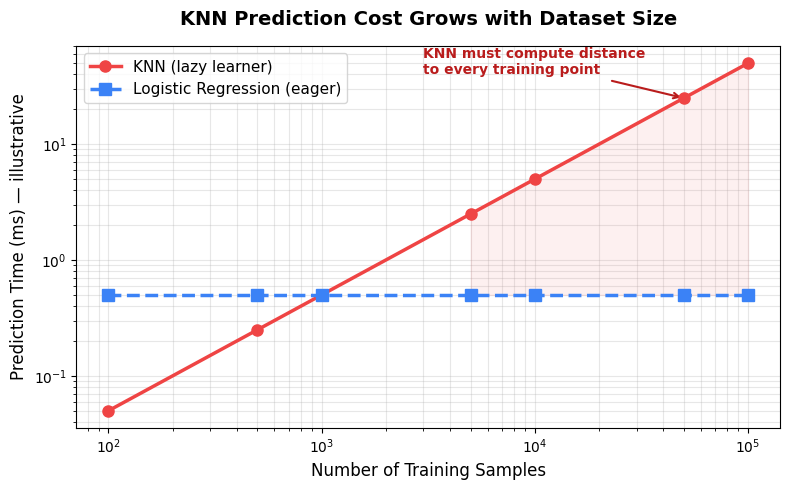

In [4]:
## Graph — KNN Prediction Time vs Dataset Size

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 5))

n_samples = np.array([100, 500, 1000, 5000, 10000, 50000, 100000])

# Simulated prediction times (proportional to n for KNN, constant for eager)
knn_time = n_samples * 0.0005      # grows linearly
eager_time = np.full_like(n_samples, 0.5, dtype=float)  # roughly constant

ax.plot(n_samples, knn_time, 'o-', color='#ef4444', linewidth=2.5, markersize=8, label='KNN (lazy learner)', zorder=5)
ax.plot(n_samples, eager_time, 's--', color='#3b82f6', linewidth=2.5, markersize=8, label='Logistic Regression (eager)', zorder=5)

ax.fill_between(n_samples, knn_time, eager_time, where=(knn_time > eager_time),
                alpha=0.08, color='#ef4444')

ax.set_xlabel('Number of Training Samples', fontsize=12)
ax.set_ylabel('Prediction Time (ms) — illustrative', fontsize=12)
ax.set_title('KNN Prediction Cost Grows with Dataset Size', fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=11, loc='upper left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(True, alpha=0.3, which='both')
ax.set_axisbelow(True)

# Annotation
ax.annotate('KNN must compute distance\nto every training point',
            xy=(50000, 50000*0.0005), xytext=(3000, 40),
            fontsize=10, color='#b91c1c', fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='#b91c1c', lw=1.5))

plt.tight_layout()
plt.show()

---

## Q7 — Adjusting K for Fraud Detection

> A fraud detection KNN model predicts many **legitimate transactions as fraud** (high false-positive rate). Which K-related adjustment may help?

**Answer:** **Increase K.** A small K makes the model sensitive to noise — individual outliers can dominate the vote. Increasing K smooths the decision boundary and reduces false positives by requiring a stronger consensus among neighbors.

| K Value | Behavior |
|---|---|
| Small K (e.g., 1–3) | Captures local patterns but prone to noise / overfitting |
| Large K (e.g., 15–25) | Smoother boundaries, more stable, but may underfit |

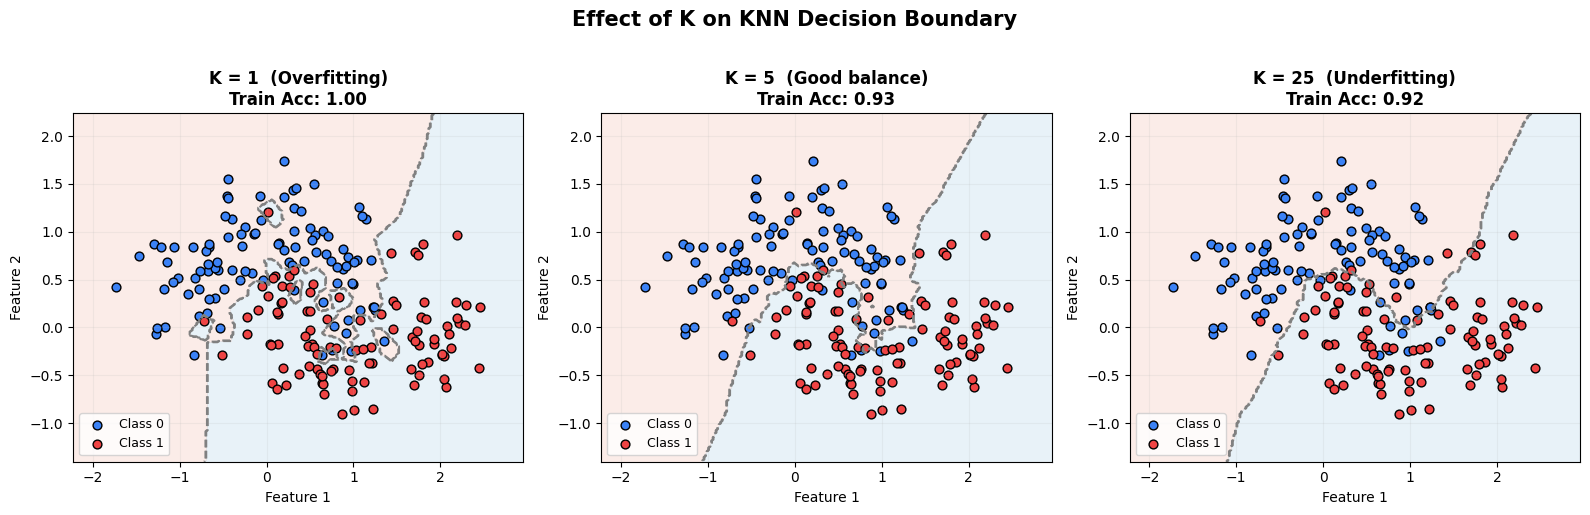

In [5]:
## Graph — Effect of K on Decision Boundary (Overfitting vs Underfitting)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

# Generate a noisy 2-class dataset
X, y = make_moons(n_samples=200, noise=0.3, random_state=42)

k_values = [1, 5, 25]
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for ax, k in zip(axes, k_values):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Decision boundary
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
                         np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.15, cmap='RdBu', levels=1)
    ax.contour(xx, yy, Z, colors='gray', linewidths=1.5, levels=1, linestyles='--')

    ax.scatter(X[y == 0, 0], X[y == 0, 1], c='#3b82f6', edgecolors='black', s=40, label='Class 0')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], c='#ef4444', edgecolors='black', s=40, label='Class 1')

    train_acc = clf.score(X, y)
    status = 'Overfitting' if k == 1 else ('Good balance' if k == 5 else 'Underfitting')
    ax.set_title(f'K = {k}  ({status})\nTrain Acc: {train_acc:.2f}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend(fontsize=9, loc='lower left')
    ax.grid(True, alpha=0.15)

fig.suptitle('Effect of K on KNN Decision Boundary', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---

## Q8 — KNN in Real-Time Systems

> A real-time system needs **instant predictions** with **millions of data points**. Why is KNN not ideal?

**Answer:** KNN is a **lazy learner** — it does no work during training and instead computes the distance from the query point to **every** training sample at prediction time. With millions of data points, this means millions of distance calculations per prediction, making it far too slow for real-time requirements.

| Factor | Impact on KNN |
|---|---|
| **Time complexity** | O(*n* · *d*) per prediction, where *n* = training size, *d* = features |
| **No precomputed model** | Nothing is learned ahead of time; all work happens at inference |
| **Memory** | Must store the entire training set in memory |
| **Better alternatives** | Tree-based models, logistic regression, or neural networks that learn parameters once and predict in O(1) or O(log *n*) |

---

## Key Takeaways

| Concept | Summary |
|---|---|
| **Classification vs Regression** | Discrete labels = classification; continuous values = regression |
| **Majority Voting** | KNN classification picks the class with the most neighbors |
| **Averaging** | KNN regression averages the target values of K neighbors |
| **Distance Weighting** | Closer neighbors get higher influence via $w = 1/d$ |
| **Lazy Learner** | KNN stores training data and computes distances at prediction time |
| **Choosing K** | Small K = overfitting / noise-sensitive; Large K = smoother / possible underfitting |
| **Real-Time Systems** | KNN's O(*n* · *d*) prediction cost makes it impractical for large-scale, low-latency applications |